In [72]:
import pandas as pd
import numpy as np
import shapely

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [73]:
crime = pd.read_csv('./SFPD_Incidents_-_from_1_January_2003.csv')

In [10]:
crime = crime.sample(50000)

In [74]:
from datetime import datetime as dt
print crime.index.dtype
crime['Date'] = pd.to_datetime(crime['Date'])
crime.set_index('Date',inplace= True)

crime['year'] = crime.index.map(lambda val: val.year)
crime.head(1)

int64


,IncidntNum,Category,Descript,DayOfWeek,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,year
Date,,,,,,,,,,,,,
2015-05-29,110914565,WARRANTS,WARRANT ARREST,Friday,16:42,SOUTHERN,"ARREST, BOOKED",BRYANT ST / 8TH ST,-122.406971,37.772527,"(37.7725273607571, -122.406970988225)",11091456563010,2015


In [75]:
crime.head()

,IncidntNum,Category,Descript,DayOfWeek,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,year
Date,,,,,,,,,,,,,
2015-05-29,110914565,WARRANTS,WARRANT ARREST,Friday,16:42,SOUTHERN,"ARREST, BOOKED",BRYANT ST / 8TH ST,-122.406971,37.772527,"(37.7725273607571, -122.406970988225)",11091456563010,2015
2015-05-29,110914565,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Friday,16:42,SOUTHERN,"ARREST, BOOKED",BRYANT ST / 8TH ST,-122.406971,37.772527,"(37.7725273607571, -122.406970988225)",11091456565010,2015
2015-10-02,111008842,ROBBERY,ATTEMPTED ROBBERY WITH BODILY FORCE,Friday,22:21,TARAVAL,"ARREST, BOOKED",ALEMANY BL / KEMPTON AV,-122.468426,37.710955,"(37.7109549221546, -122.468425552228)",11100884203474,2015
2015-10-02,111008842,ASSAULT,BATTERY WITH SERIOUS INJURIES,Friday,22:21,TARAVAL,"ARREST, BOOKED",ALEMANY BL / KEMPTON AV,-122.468426,37.710955,"(37.7109549221546, -122.468425552228)",11100884204136,2015
2015-10-02,111008842,OTHER OFFENSES,RESISTING ARREST,Friday,22:21,TARAVAL,"ARREST, BOOKED",ALEMANY BL / KEMPTON AV,-122.468426,37.710955,"(37.7109549221546, -122.468425552228)",11100884227170,2015


In [76]:
crime.Descript.apply(lambda x: 'MARIJUANA' in x).value_counts()

False    1893692
True       21601
Name: Descript, dtype: int64

In [77]:
crime.Descript.apply(lambda x: 'MINOR' in x).value_counts()

False    1913128
True        2165
Name: Descript, dtype: int64

In [78]:
minor = crime[crime.Descript.apply(lambda x: 'MINOR' in x) == True]

In [44]:
from sklearn.feature_extraction.text import CountVectorizer

cvt = CountVectorizer()
print cvt

cvt.fit(minor.Descript)

tmp = cvt.build_analyzer()

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)


In [49]:
cvt.transform(minor.Descript).todense()

matrix([[1, 0, 1, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        ..., 
        [1, 0, 1, ..., 0, 0, 0],
        [1, 0, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [55]:
cvt.get_feature_names()

[u'alcohol',
 u'barbituates',
 u'by',
 u'care',
 u'contributing',
 u'delinquency',
 u'encourage',
 u'furnishing',
 u'licensed',
 u'minor',
 u'of',
 u'on',
 u'or',
 u'parental',
 u'possession',
 u'premise',
 u'products',
 u'proper',
 u'sale',
 u'selling',
 u'the',
 u'to',
 u'tobacco',
 u'use',
 u'without']

In [56]:
cvt.transform()

TypeError: transform() takes exactly 2 arguments (1 given)

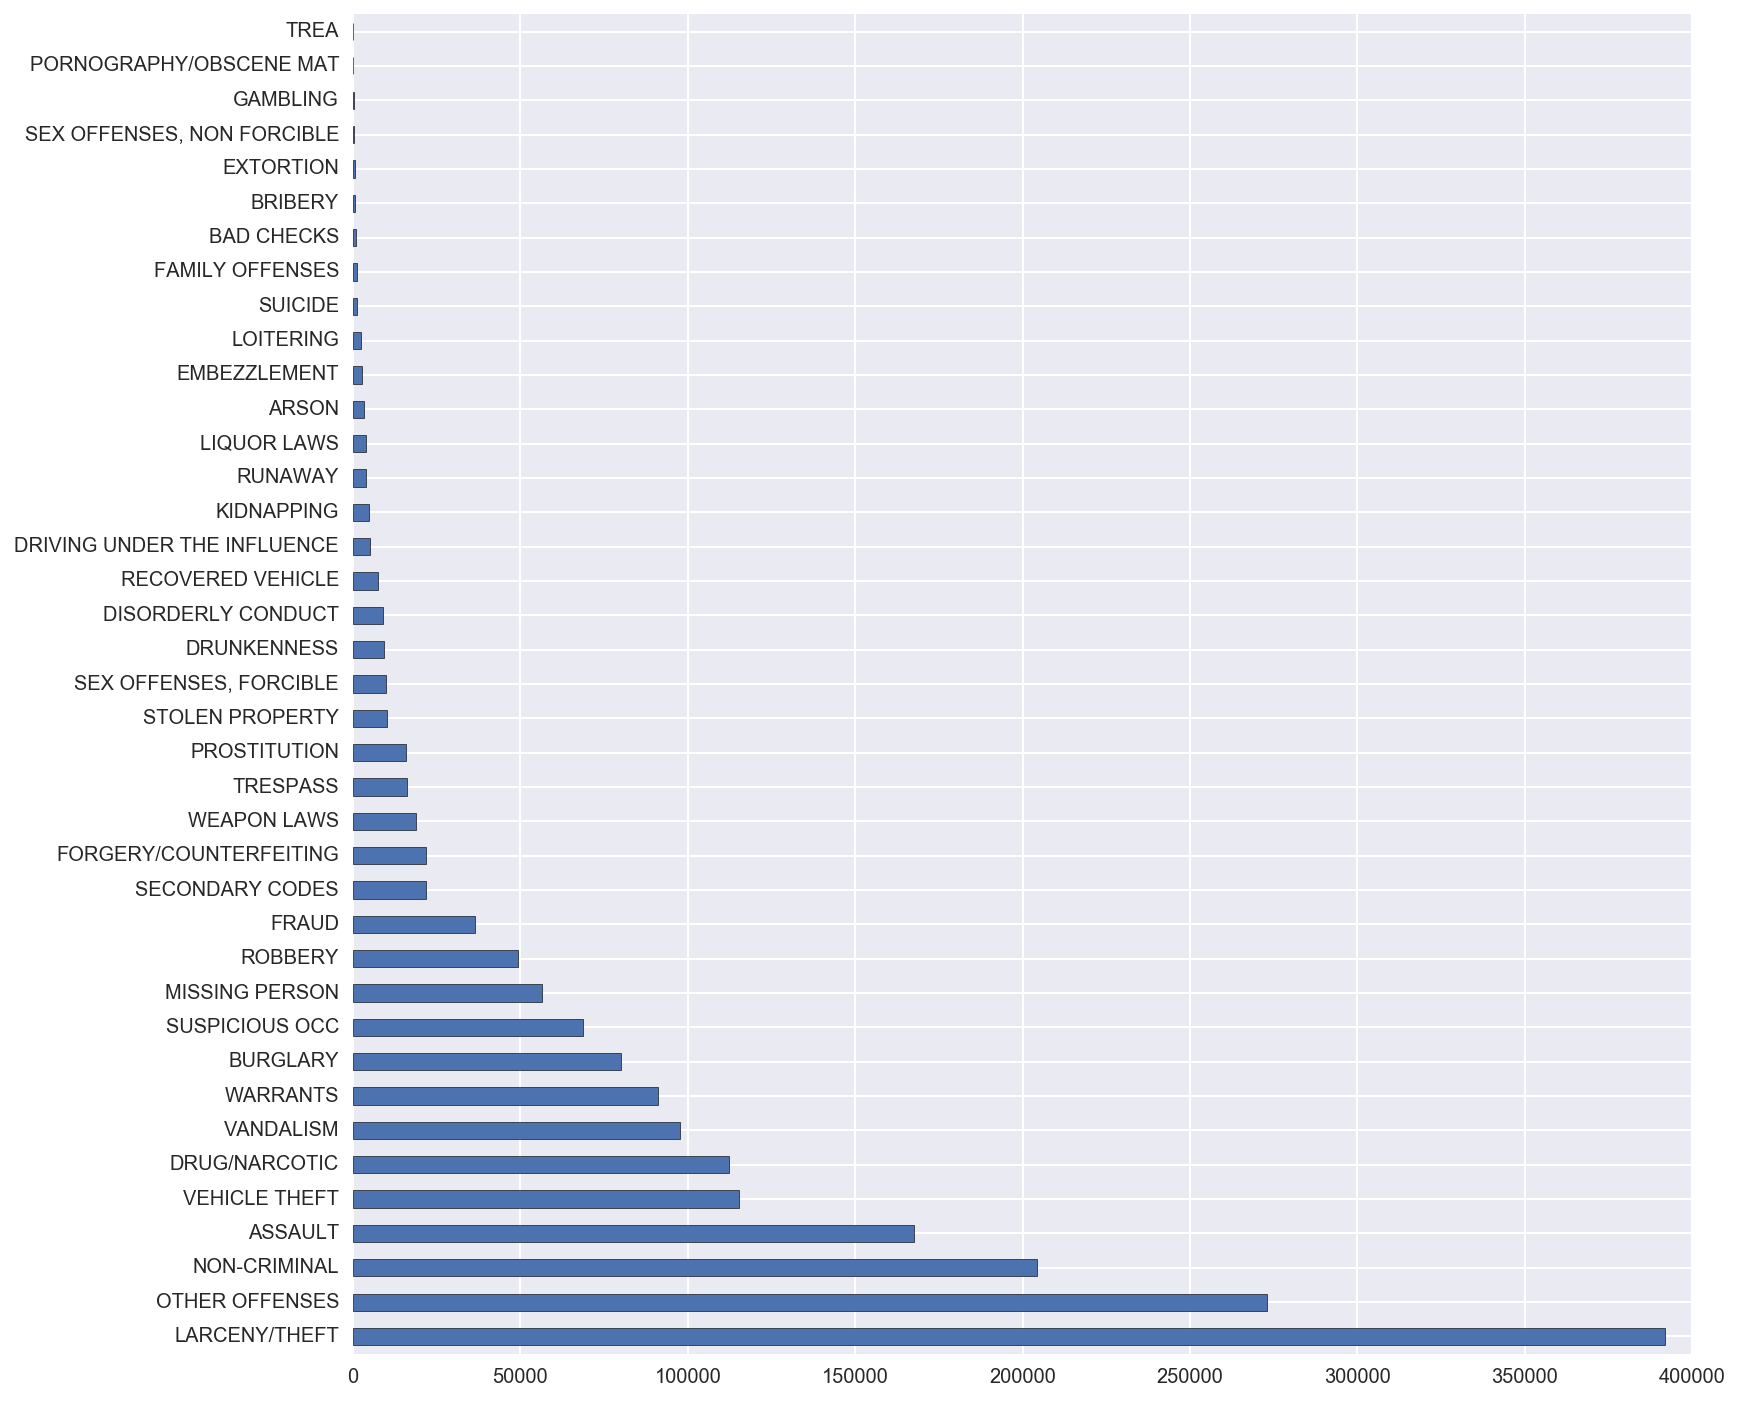

In [79]:
sns.set(rc={"figure.figsize": (12, 12)})
crime.Category.value_counts().plot(kind = 'barh')

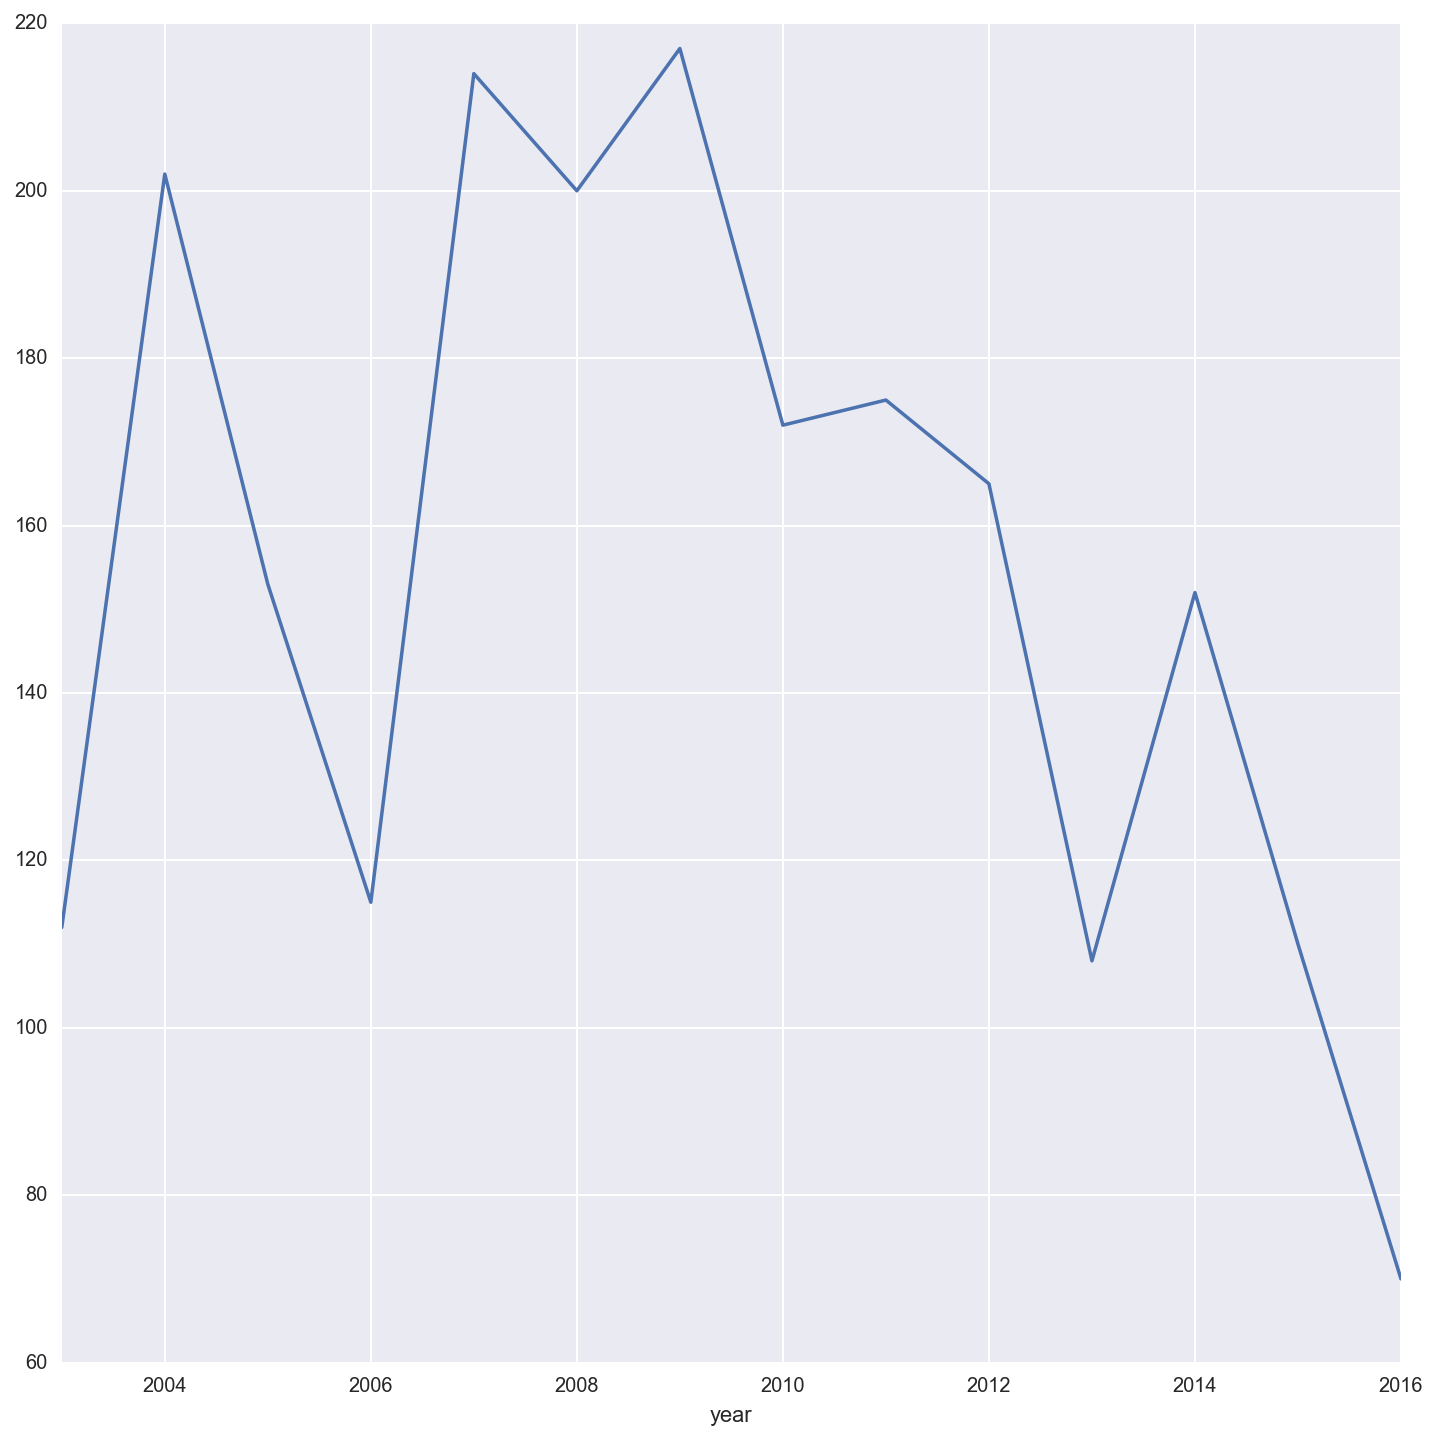

In [106]:
minor.groupby('year').count().IncidntNum.plot()

In [109]:
# is there a correlation between rent increasing and increasing in reporting of non violent crimes
crime[crime.Category == 'NON-CRIMINAL'].Descript

Date
2016-02-05                                CASE CLOSURE
2015-11-05                                CASE CLOSURE
2016-03-26                    LICENSE PLATE, RECOVERED
2016-01-03                               LOST PROPERTY
2015-01-01                        AIDED CASE, DOG BITE
2015-01-01                    LICENSE PLATE, RECOVERED
2015-01-01                    LICENSE PLATE, RECOVERED
2015-01-01    STAY AWAY OR COURT ORDER, NON-DV RELATED
2015-01-01                              FOUND PROPERTY
2015-01-01                              FOUND PROPERTY
2015-01-01                              FOUND PROPERTY
2015-01-01                              FOUND PROPERTY
2015-01-01                AIDED CASE, MENTAL DISTURBED
2015-01-01                              FOUND PROPERTY
2015-01-01                AIDED CASE, MENTAL DISTURBED
2015-01-01                             COURTESY REPORT
2015-01-02                              FOUND PROPERTY
2015-01-02                AIDED CASE, MENTAL DISTURBED
2015-

In [112]:
vandalism = crime[crime.Category == 'VANDALISM']

In [115]:
vandalism.Descript

Date
2015-03-29                MALICIOUS MISCHIEF, VANDALISM
2015-01-02         MALICIOUS MISCHIEF, BREAKING WINDOWS
2015-01-03    MALICIOUS MISCHIEF, VANDALISM OF VEHICLES
2015-01-03            MALICIOUS MISCHIEF, TIRE SLASHING
2015-01-03                MALICIOUS MISCHIEF, VANDALISM
2015-01-02    MALICIOUS MISCHIEF, VANDALISM OF VEHICLES
2015-01-02    MALICIOUS MISCHIEF, VANDALISM OF VEHICLES
2015-01-03            MALICIOUS MISCHIEF, ADULT SUSPECT
2015-01-02                MALICIOUS MISCHIEF, VANDALISM
2015-01-05            MALICIOUS MISCHIEF, TIRE SLASHING
2015-01-06    MALICIOUS MISCHIEF, VANDALISM OF VEHICLES
2015-01-06    MALICIOUS MISCHIEF, VANDALISM OF VEHICLES
2015-01-06                MALICIOUS MISCHIEF, VANDALISM
2015-01-05    MALICIOUS MISCHIEF, VANDALISM OF VEHICLES
2015-01-06    MALICIOUS MISCHIEF, VANDALISM OF VEHICLES
2015-01-06    MALICIOUS MISCHIEF, VANDALISM OF VEHICLES
2015-01-06         MALICIOUS MISCHIEF, BREAKING WINDOWS
2015-01-07    MALICIOUS MISCHIEF, VANDALISM

In [117]:
graffiti = vandalism[vandalism.Descript.apply(lambda x: 'GRAFFITI' in x) == True]

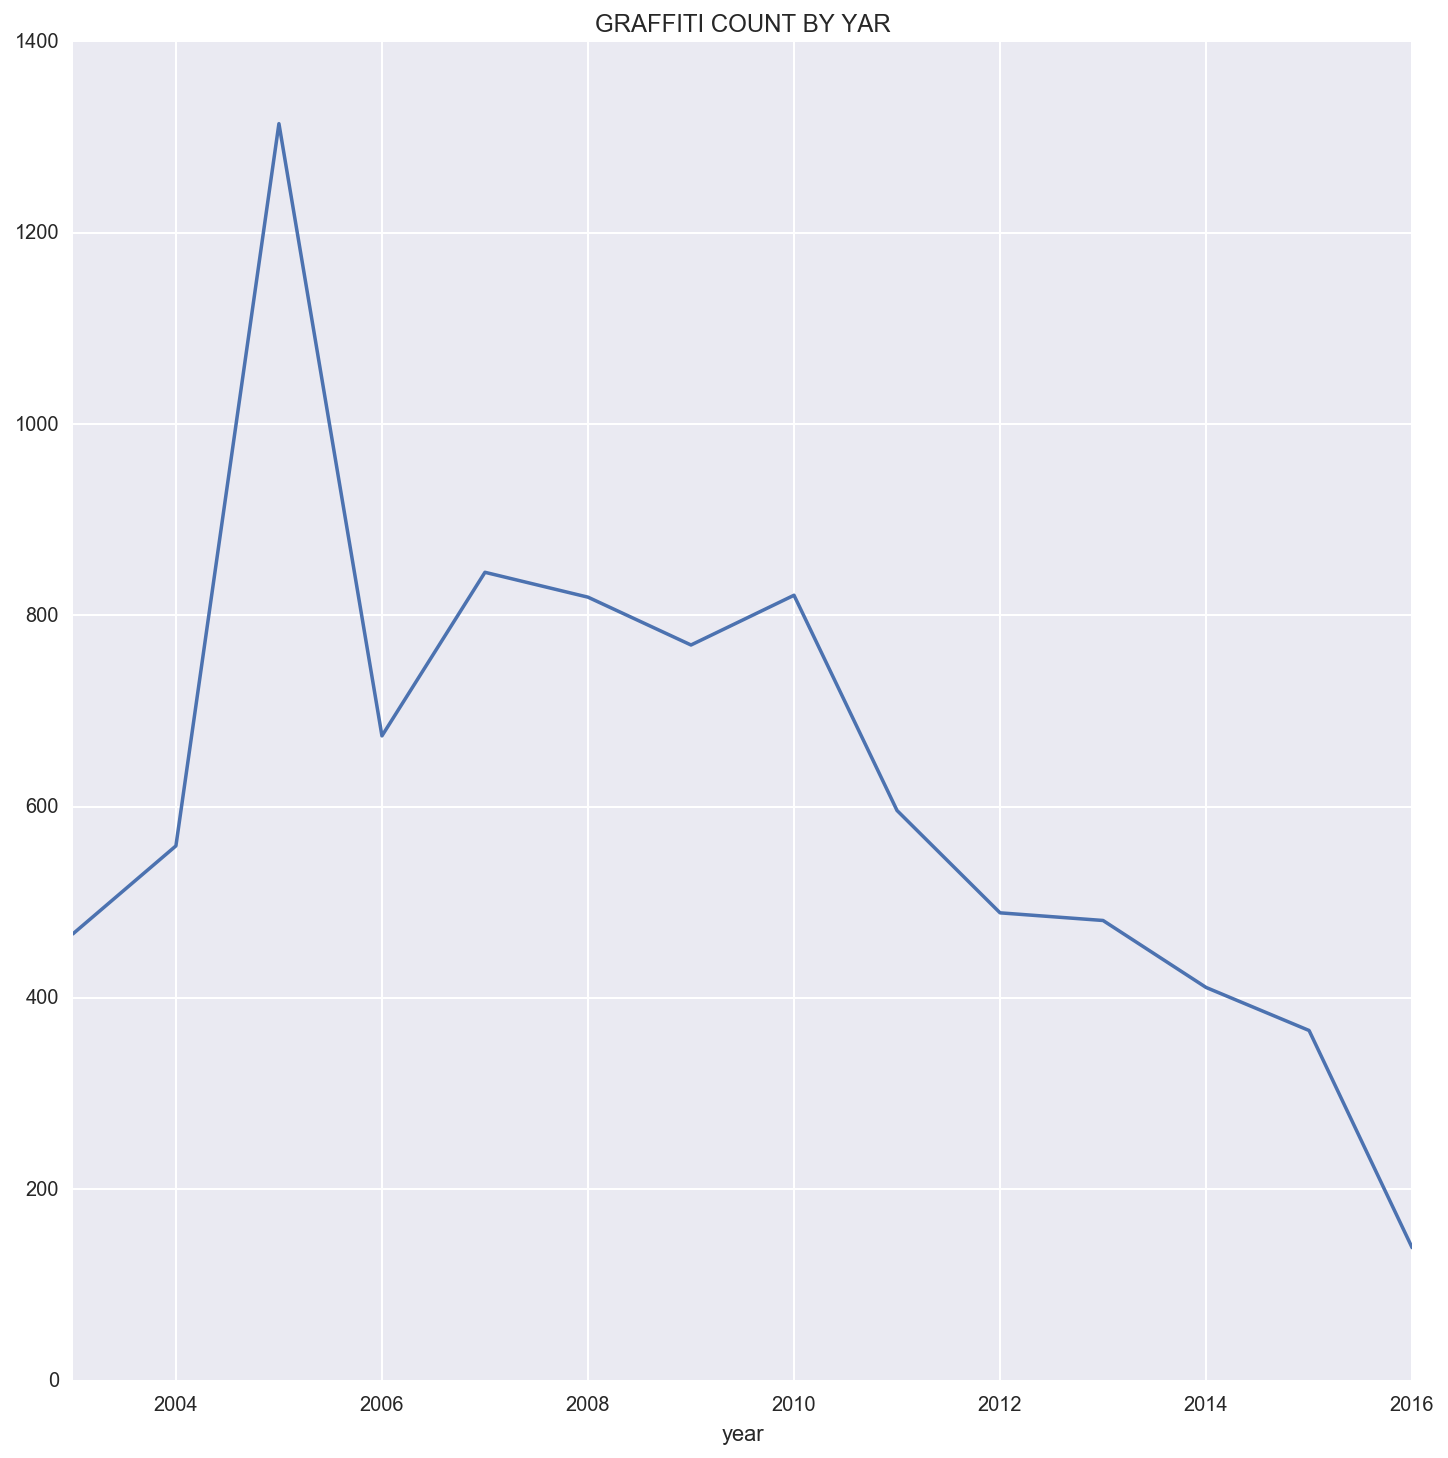

In [121]:
graffiti.groupby('year').count().Category.plot(title = 'GRAFFITI COUNT BY YAR')

In [124]:
geom = pd.read_csv('/Users/Stav/Downloads/planning_neighborhoods.csv')

In [128]:
geom.neighborho = geom.neighborho.apply(lambda x: x.lower())
geom.neighborho = geom.neighborho.apply(lambda x: "mission district" if x == 'mission' else x)

In [129]:
geom.neighborho

0                  seacliff
1            crocker amazon
2                    marina
3                   bayview
4                  nob hill
5               north beach
6           south of market
7              potrero hill
8                  parkside
9            inner richmond
10         mission district
11          diamond heights
12               noe valley
13                lakeshore
14       financial district
15       west of twin peaks
16          pacific heights
17             russian hill
18             inner sunset
19    downtown/civic center
20      treasure island/ybi
21           outer richmond
22               twin peaks
23                excelsior
24                 presidio
25               ocean view
26             outer sunset
27           haight ashbury
28            outer mission
29        visitacion valley
30         presidio heights
31                glen park
32      castro/upper market
33           bernal heights
34                chinatown
35         western a

NameError: name 'choro' is not defined